## **Tugas Besar Strategi Algoritma**
#### **Analisis Perbandingan Metode Brute Force, Greedy, Dan Dynamic Programming Pada Coin Change problem**

Oleh :
1.   Hanvito Michael Lee - 1301190090
2.   Kurniadi Ahmad Wijaya - 1301194024
3.   Naufal Haritsah Luthfi - 1301194073

### **Deskripsi Tugas**

Masalah  optimasi  merupakan  masalah untuk  mencari solusi  optimum. 
Salah satu dari masalah optimasi adalah persoalan penukaran uang atau coin change. Dimana persoalan ini membahas tentang bagaimana cara agar dapat menukar uang dengan nilai yang sama namun dengan jumlah uang yang lebih sedikit dari berbagai satuan. Contohnya ketika kita ingin menukarkan uang Rp 1.800 dengan uang 100, 200, 500 maupun 1000. Untuk menyelesaikan persoalan penukaran uang dapat digunakan beberapa algoritma. Untuk mengetahui algoritma yang paling baik, dilakukan analisis terhadap tiga algoritma pemecahan masalah yaitu Brute Force, Greedy, dan Dynamic Programming.

### **Analisis Kompleksitas Algoritma**

#### **Metode Brute Force**

Konsep pada algoritma brute force yaitu mencoba semua kemungkinan yang ada, kemudian mengembalikan solusi yang paling optimal. Di dalam algoritma ini terdapat fungsi rekursif yang mencari semua kemungkinan. Setelah melewati fungsi rekursif tersebut, barulah algoritma ini mengembalikan nilai minimum. Ilustrasi Coin Change Problem menggunakan metode Brute Force :

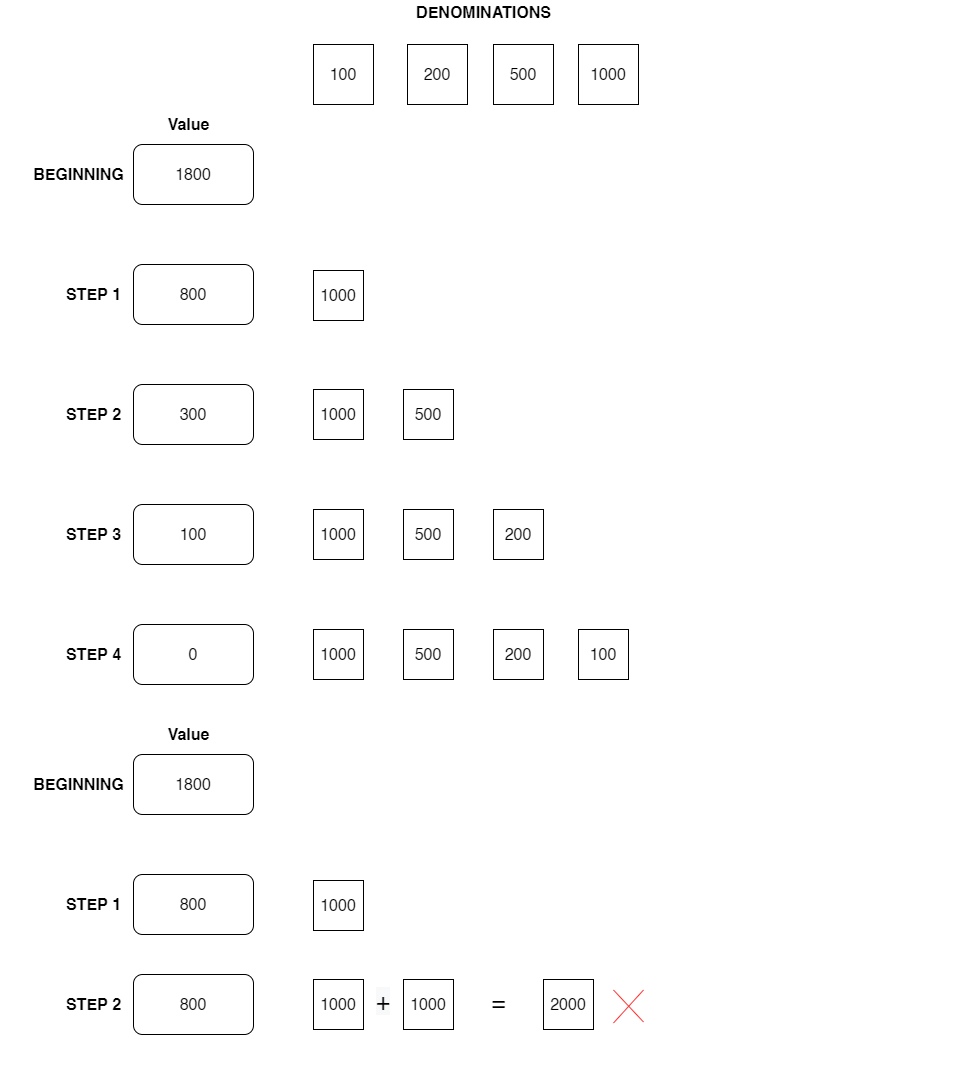

#### **Metode Greedy**

Secara harfiah, greedy berarti rakus atau tamak. Algoritma Greedy merupakan algoritma sederhana yang paling populer untuk pemecahan persoalan optimasi seperti halnya coin change.
Ilustrasi Coin Change Problem menggunakan metode Greedy :

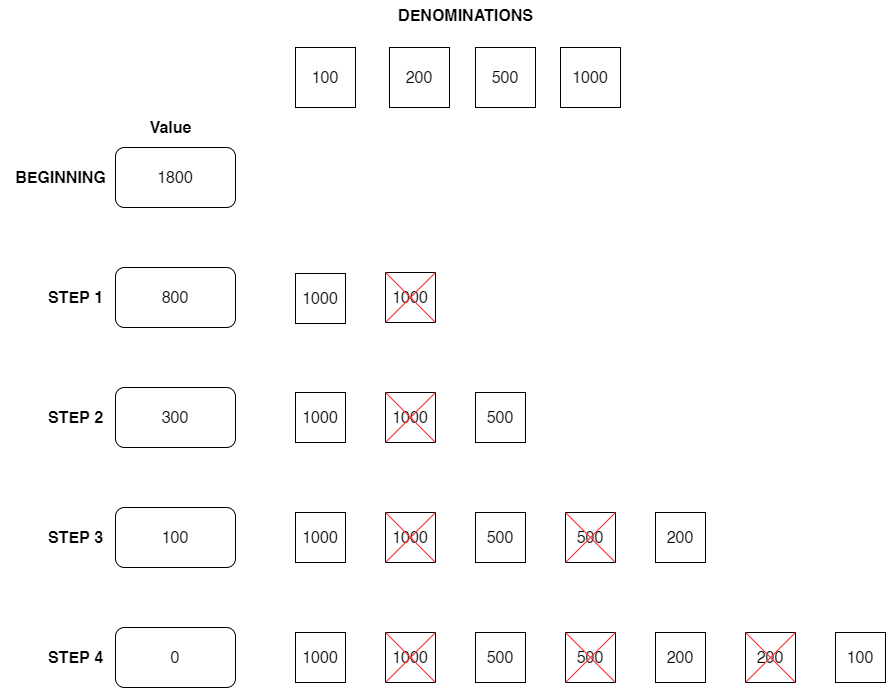

####  **Metode Dynamic Programming**

Dynamic Programming adalah metode pemecahan masalah dengan cara menguraikan solusi menjadi sekumpulan langkah (step) atau tahapan (stage) sedemikian sehingga solusi dari persoalan dapat dipandang dari serangkaian keputusan yang saling berkaitan. Ilustrasi Coin Change menggunakan metode Dynamic Programming :

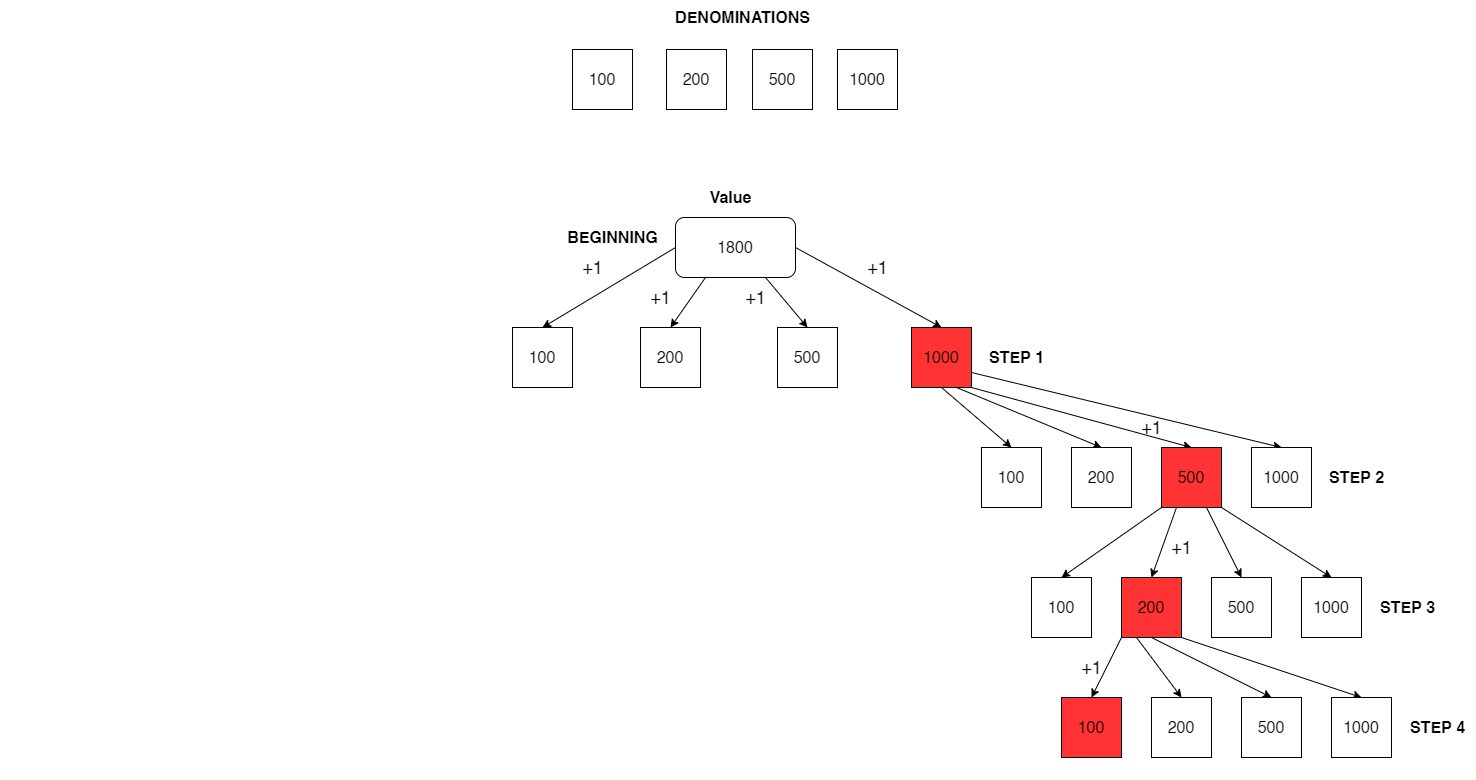

###  **Implementasi Kode**

#### **Metode Brute Force**

Untuk metode brute force, 
1. Inisialisasi variabel changes yang berupa array yang akan diisi sebagai nilai pengembalian akhir 
2. Akan dilakukan perulangan sampai money bernilai 0
3. Akan dilakukan pengecekan apakah i bernilai kurang dari panjang array coins
4. Akan dilakukan pengecekan apakah money - array coins ke i lebih besar sama dengan 0, jika iya maka nilai money akan dikurangi dengan nilai coins ke i dan nilai coins ke i tersebut akan di masukkan kedalam array changes. Jika tidak, maka nilai i akan bertambah 1

In [ ]:
def brute_force(coins, money):

    # inisialisasi i dan array changes
    i = 0
    changes = []

    # Perulangan hingga money bernilai 0
    while money != 0 :

        # Percabangan untuk mengecek apakah i benilai kurang dari panjang array coins
        if i < len(coins):

            # Percabangan untuk mengecek apakah nilai money dikurangi coins ke i lebih besar sama dengan 0
            # Mengurangi nilai money dengan coins ke i dan memasukkannya ke dalam array changes
            if money - coins[i] >= 0 :
                money -= coins[i]
                changes.append(coins[i])
            else:
                i += 1

    return changes 

**Perhitungan Big-O (Worst Case Scenario)**

Perhitungan Big-O ( Worst Case Scenario ) Untuk Algoritma Brute Force, untuk perulangan while akan memiliki Big-O sebesar O(n) karena akan melakukan perulangan sebanyak n kali. Dan memiliki 2 percabangan. Sehingga perhitungan Kompleksitasnya sebagai berikut :

\begin{align}
A(n) &= \sum_{i=1}^{n} 2
\\
A(n) &= 2 \sum_{i=1}^{n}1
\\
\\
A(n) &= 2 (n +1 - 1)
\\
A(n) &= 2n
\end{align}


**Notasi Asimtotik Worst Case Scenario**
\begin{align}
T(n) = 2n \in O(n)
\end{align}

#### **Metode Greedy**

Untuk metode greedy,
1. Inisialisasi variabel changes yang berupa array yang akan diisi sebagai nilai pengembalian akhir
2. Akan dilakukan perulangan sampai money bernilai 0
3. Akan dilakukan perulangan setiap nilai pada array coins
4. Akan dilakukan pengecekan apakah money - coin lebih besar sama dengan 0 dan nilai change kurang dari nilai coin, jika iya maka nilai change akan bernilai coin.
5. Selanjutnya nilai change akan dimasukkan ke array changes dan nilai money akan dikurangi dengan nilai change.

In [ ]:
def greedy(coins, money):

    # Inisialisasi array changes
    changes = []

    # Perulangan hingga money bernilai 0
    while money != 0:
          change = 0

          # Perulangan Untuk Pengecekkan nilai coin 
          for coin in coins: 
              if money - coin >= 0 and change < coin:
                 change = coin
            
          # Memasukkan nilai change ke dalam array changes dan mengurangi
          # nilai money dengan nilai change
          changes.append(change)
          money -= change
    
    return changes

**Perhitungan Big-O (Worst Case Scenario)**

Perhitungan Big-O ( Worst Case Scenario )
Untuk Algoritma Greedy, untuk perulangan while akan memiliki Big-O sebesar O(n) karena akan melakukan perulangan sebanyak n kali. Dan untuk perulangan for akan memiliki Big-O sebesar O(m) dimana m akan bernilai berapa banyak coins untuk pengganti nilai n yang digunakan. Untuk perhitungan Kompleksitasnya sebagai berikut :



\begin{align}
A(n) &= \sum_{i=1}^{n} \sum_{i=1}^{m} 2
\\
A(n) &= 2 \sum_{i=1}^{n} \sum_{i=1}^{m} 1
\\
A(n) &= 2 \sum_{i=1}^{n} m + 1 - 1
\\
A(n) &= 2(m + \sum_{i=1}^{n} 1)
\\
A(n) &= 2 (m + n +1 - 1)
\\
A(n) &= 2(m + n)
\end{align}


**Notasi Asimtotik Worst Case Scenario**

\begin{align}
T(n) = 2(m + n) \in O(n), n > m
\end{align}

#### **Metode Dynamic Programming**

Untuk metode dynamic programming,
1. Inisialisasi variabel changes berupa array yang akan diisi sebagai nilai pengembalian akhir
2. Melakukan perulangan dari 0 sampai jumlah uang
3. Mengimplementasikan model bottom to top dengan melakukan pengecekan perulangan angka dari 0 sampai jumlah uang sesuai dengan koin yang ada
4. Menyimpan setiap hasil pengecekan per array
5. Melakukan perulangan dengan mengambil data awal dengan menggunakan index jumlah uang dilanjutkan dengan mengurangi isi dari index tersebut hingga uang sama dengan 0

In [ ]:
def dynamic_programming(coins, money):
    total = money
    coin_values = coins

    # Inisialisasi Array [0, 0, ... Hingga ke total] 
    coin_count = [0]*(total+1)
    used_coins = [0]*(total+1)

    # Perulangan 0, 1, 2 ... total
    for cents in range(total+1):
        count = cents
        coin = 1
        
        # Perulangan Untuk Pengecekkan nilai cents yang valid terhadap array coins
        for coin_value in coin_values: 
            if coin_value <= cents and coin_count[cents-coin_value] + 1 < count:   

               # Memasukkan nilai koin yang dapat ditukarkan pada total uang
               count = coin_count[cents-coin_value] + 1
               coin = coin_value

            # Memasukkan nilai yang telah diganti kedalam array yang telah didefinisikan
            coin_count[cents] = count
            used_coins[cents] = coin

    # Inisialisasi variabel result untuk hasil koin yang ditukarkan
    result = []
    coin = total

    # Perulangan mengambil koin dengan index uang secara backtracking
    while coin > 0:
        used = used_coins[coin]
        result.append(used)
        coin = coin - used

    return result

**Perhitungan Big-O (Worst Case Scenario)**


Perhitungan Big-O ( Worst Case Scenario ) Untuk Dynamic Programming, untuk perulangan for yang pertama akan memiliki Big-O sebesar O(n) karena akan melakukan perulangan sebanyak n kali. Dan untuk perulangan for kedua  akan memiliki Big-O sebesar O(m) dimana m akan bernilai berapa banyak coins untuk pengganti nilai n yang digunakan. Untuk while yang terakhir, akan memiliki Big-O sebesar O(n). Sehinnga perhitungan Kompleksitasnya sebagai berikut :

\begin{align}
A(n) &= \sum_{i=1}^{n} \sum_{i=1}^{m} 2 + \sum_{i=1}^{n}1
\\
A(n) &= 2 (\sum_{i=1}^{n} \sum_{i=1}^{m} 1) + n + 1 - 1
\\
A(n) &= 2 (\sum_{i=1}^{n} m + 1 - 1) + n
\\
A(n) &= 2(m + \sum_{i=1}^{n} 1) + n
\\
A(n) &= 2 (m + n +1 - 1) + n
\\
A(n) &= 2(m + n) + n
\\
A(n) &= 2m + 2n + n
\\
A(n) &= 2m + 3n
\end{align}


**Notasi Asimtotik Worst Case Scenario**

\begin{align}
T(n) = 2m + 3n \in O(n), n > m
\end{align}

### **Analisis Metode**

In [ ]:
import timeit

def calculate(start): 
    stop = timeit.default_timer()
    execution_time = stop - start
    return round(execution_time, 6)

#### **Inisialisasi Variabel Coin Dan Jumlah Penukaran Uang**

In [ ]:
coins = [5000, 2500, 500, 200, 70, 30, 15]
money = [2200, 3500, 5500, 7600, 8570, 9945]

#### **Inisialisasi Fungsi Perhitungan Waktu Eksekusi**

In [ ]:
m_time = []

def count_time(coins, money, method, name):
    for i, money in enumerate(money):
        start = timeit.default_timer()
        print(f'Hasil Iterasi Uang {money}: {method(coins, money)}')
        m_time.append([name, money, calculate(start)])

#### **Perhitungan Koin**

In [ ]:
count_time(coins, money, brute_force, 'Brute Force')

Hasil Iterasi Uang 2200: [500, 500, 500, 500, 200]
Hasil Iterasi Uang 3500: [2500, 500, 500]
Hasil Iterasi Uang 5500: [5000, 500]
Hasil Iterasi Uang 7600: [5000, 2500, 70, 30]
Hasil Iterasi Uang 8570: [5000, 2500, 500, 500, 70]
Hasil Iterasi Uang 9945: [5000, 2500, 500, 500, 500, 500, 200, 200, 30, 15]


In [ ]:
count_time(coins, money, greedy, 'Greedy')

Hasil Iterasi Uang 2200: [500, 500, 500, 500, 200]
Hasil Iterasi Uang 3500: [2500, 500, 500]
Hasil Iterasi Uang 5500: [5000, 500]
Hasil Iterasi Uang 7600: [5000, 2500, 70, 30]
Hasil Iterasi Uang 8570: [5000, 2500, 500, 500, 70]
Hasil Iterasi Uang 9945: [5000, 2500, 500, 500, 500, 500, 200, 200, 30, 15]


In [ ]:
count_time(coins, money, dynamic_programming, 'Dynamic Programming')

Hasil Iterasi Uang 2200: [500, 500, 500, 500, 200]
Hasil Iterasi Uang 3500: [2500, 500, 500]
Hasil Iterasi Uang 5500: [5000, 500]
Hasil Iterasi Uang 7600: [5000, 2500, 70, 30]
Hasil Iterasi Uang 8570: [5000, 2500, 500, 500, 70]
Hasil Iterasi Uang 9945: [5000, 2500, 500, 500, 500, 500, 200, 200, 30, 15]


#### **Hasil Waktu Eksekusi**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

m_time = pd.DataFrame(m_time, columns =['Method', 'Money', 'Time']) 

#### **Grafik Waktu Eksekusi**

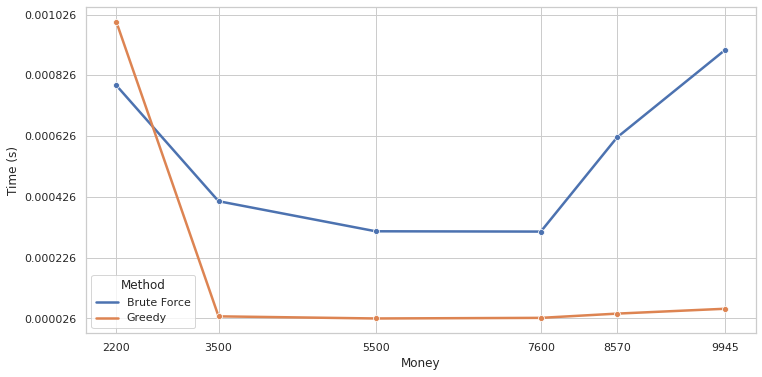

In [ ]:
range = len(money)*3-len(money)

plt.figure(figsize=(12, 6))
sns.set_context("notebook", rc={"lines.linewidth": 2.5})
sns.set_style("whitegrid")
sns.lineplot(data=m_time[:range], x='Money', y='Time', hue='Method', marker="o", palette="deep", ci=None)

plt.ylabel("Time (s)")
plt.yticks(np.arange(min(m_time['Time']), max(m_time[:range]['Time'])+0.0002, 0.0002))
plt.xticks(money)
plt.show()

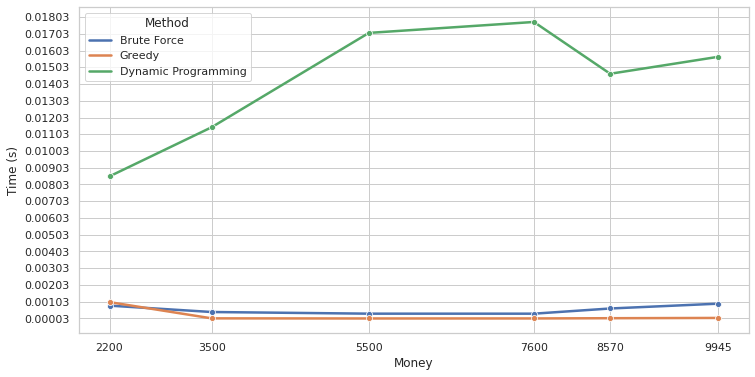

In [ ]:
plt.figure(figsize=(12, 6))
sns.set_context("notebook", rc={"lines.linewidth": 2.5})
sns.set_style("whitegrid")
sns.lineplot(data=m_time, x=m_time['Money'], y=m_time['Time'], hue=m_time['Method'], marker="o", palette="deep", ci=None)

plt.ylabel("Time (s)")
plt.yticks(np.arange(min(m_time['Time']), max(m_time['Time'])+0.0005, 0.001))
plt.xticks(money)
plt.show()

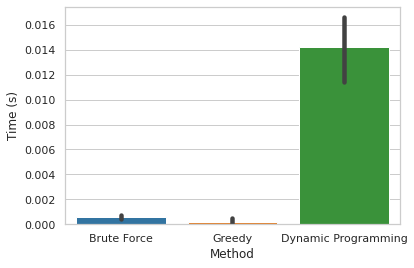

In [ ]:
sns.barplot(data=m_time, x="Method", y="Time")
plt.ylabel("Time (s)")
plt.show()

In [ ]:
m_time.groupby(['Method'])['Time'].sum().reset_index()

,Method,Time
0,Brute Force,0.003362
1,Dynamic Programming,0.085057
2,Greedy,0.001189


#### **Kesimpulan**

Berdasarkan hasil analisis dari metode brute force, greedy, dan dynamic programming pada Coin Change Problem dapat disimpulkan bahwa metode greedy memiliki kompleksitas waktu yang rendah yaitu memiliki rata-rata sebesar 0.00189s sedangkan brute force 0.003362s dan Dynamic Programming 0.085057s. Meskipun begitu metode Greedy tidak selamanya menghasilkan solusi global sehingga pada beberapa kasus penukaran koin tidak menghasilkan jumlah yang minimum sehingga solusi terbaik untuk masalah ini adalah dengan metode brute force